In [ ]:
import pandas as pd
import numpy as np

# **I. Data Exploration**

In [ ]:
# Upload the dataset
dataset_link = "/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv"
students = pd.read_csv(dataset_link)
df = students

In [ ]:
# Visualise the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Statistques descriptives
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Interpretation :**

---
- All 3 columns have the same number of values (no missing values).
- The mean of the reading score is relatively higher than writing and math scores, which suggests that students have a higher score in reading.
- The min of math score is 0, which can be a possible outlier.
- Interquartile range is approximately 20 for the 3 scores (75% - 25%), which insinuates that 50% scores are in 20 points range.
- Max scores for the 3 subjects is 100, therafore students perform excelently in them.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Interpretation :**

---
- All 9 columns have 1000 non-null values, which shows the absence of null values.

In [ ]:
# Check for NaN values
df.isna().any()

,0
gender,False
race/ethnicity,False
parental level of education,False
lunch,False
test preparation course,False
math score,False
reading score,False
writing score,False


In [ ]:
df.notna().all()

,0
gender,True
race/ethnicity,True
parental level of education,True
lunch,True
test preparation course,True
math score,True
reading score,True
writing score,True


In [ ]:
# Count the missing values in each column
missing_values = df.isna().sum().reset_index(name="missing values count")
missing_values

,index,missing values count
0,gender,0
1,race/ethnicity,0
2,parental level of education,0
3,lunch,0
4,test preparation course,0
5,math score,0
6,reading score,0
7,writing score,0


**Interpretion :**

---
- This dataset has absolutly no Nan values.

# **1. Features columns**

In [ ]:
# Gender column
gender_col = df.groupby("gender").size().reset_index(name="count")
gender_col

,gender,count
0,female,518
1,male,482


<Axes: title={'center': 'Gender Distribution'}, xlabel='gender'>

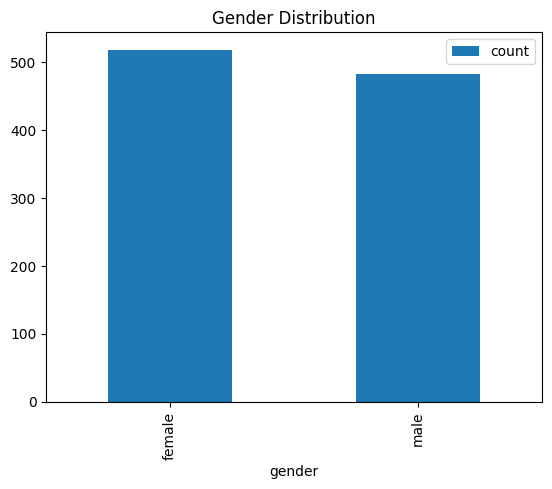

In [ ]:
# Bar plot the gender distribution
gender_col.plot.bar(
    x="gender",
    y="count",
    title="Gender Distribution"
)

**Interpretation :**

---
- Female students are generaly more than male ones.

In [ ]:
# race/ethnicity column
race_col = df.groupby("race/ethnicity").size().reset_index(name="count")
race_col

,race/ethnicity,count
0,group A,89
1,group B,190
2,group C,319
3,group D,262
4,group E,140


<Axes: title={'center': 'race distribution'}, xlabel='race/ethnicity'>

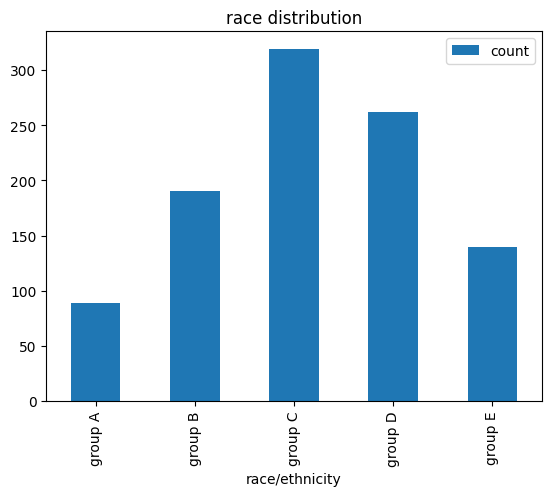

In [ ]:
# Bar plot the race distribution
race_col.plot.bar(
    x="race/ethnicity",
    y="count",
    title="race distribution"
)

**Interpretation :**

---
- 5 different race groups are present.
- Group C is the highest group followed by the group D.

In [ ]:
# parental level of education	column
parent_col = df.groupby("parental level of education").size().reset_index(name="count")
parent_col = parent_col.sort_values(by="count", ascending=False)
parent_col

,parental level of education,count
4,some college,226
0,associate's degree,222
2,high school,196
5,some high school,179
1,bachelor's degree,118
3,master's degree,59


<Axes: title={'center': 'Parental education level distribution'}, xlabel='parental level of education'>

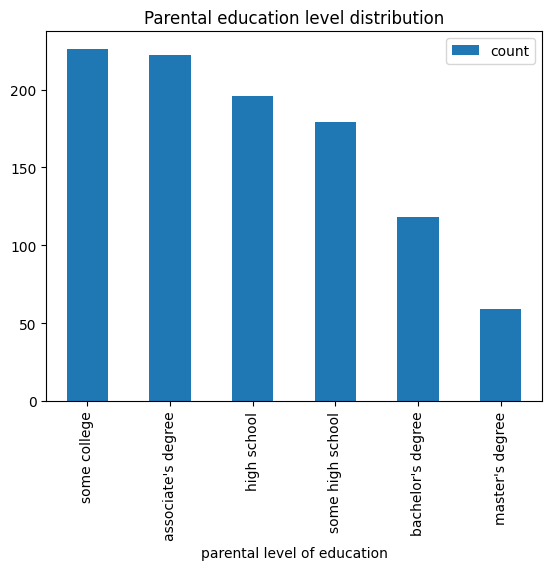

In [ ]:
parent_col.plot.bar(
    x="parental level of education",
    y="count",
    title="Parental education level distribution"
)

**Interpretation :**

---
- Most Parents' education level is "some college" and "associate's degree".

In [ ]:
# lunch column
lunch_col = df.groupby("lunch").size().reset_index(name="count")
lunch_col

,lunch,count
0,free/reduced,355
1,standard,645


<Axes: title={'center': 'lunch distribution'}, xlabel='lunch'>

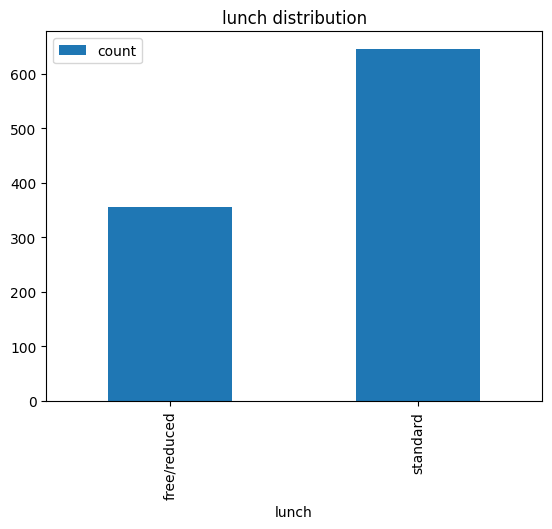

In [ ]:
# Bar plot the lunch distribution
lunch_col.plot.bar(
    x="lunch",
    y="count",
    title="lunch distribution"
)

**Interpretation :**

---
- Standard lunch is significantly higher the free/reduced, which means most students opt for the standard lunch.

In [ ]:
# test preparation course	column
test_preparation_course_col = df.groupby("test preparation course").size().reset_index(name="count")
test_preparation_course_col

,test preparation course,count
0,completed,358
1,none,642


<Axes: title={'center': 'test preparation course distribution'}, xlabel='test preparation course'>

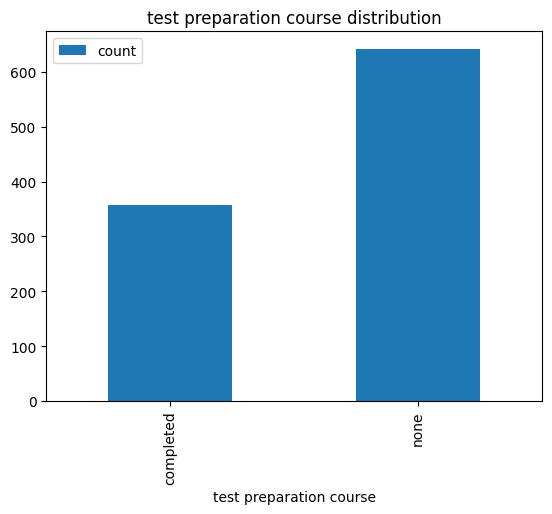

In [ ]:
# Bar plot the test preparation course distribution
test_preparation_course_col.plot.bar(
    x="test preparation course",
    y="count",
    title="test preparation course distribution"
)

**Interpretation :**

---
- The test prepartion course none is way higher than the completed one, which suggests that most students don't take this test.

# **2. Math score**

<Axes: ylabel='Frequency'>

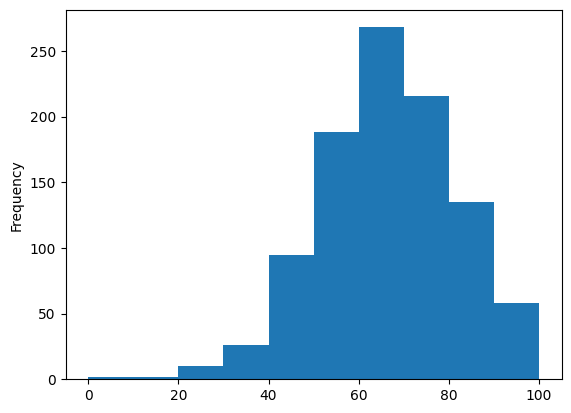

In [ ]:
# math score hist plot
df["math score"].plot.hist()

**Interpretation :**

---
1. Observations :
  - The math scores in from 0 up to 20 are significantly low.
  - The most scores are observed in the 50, 80 range.
2. Conclusions :
  - The scores from 0 up to 20 are possible outliers.

<Axes: >

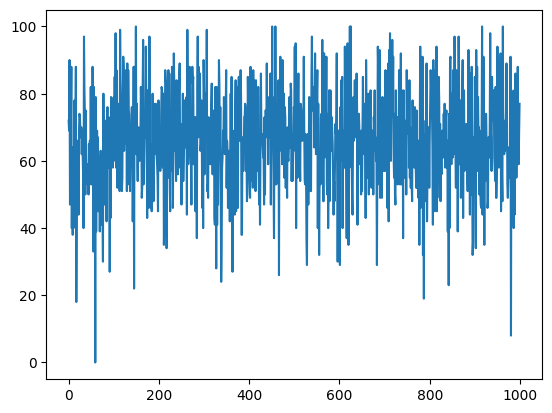

In [ ]:
df["math score"].plot()

<Axes: >

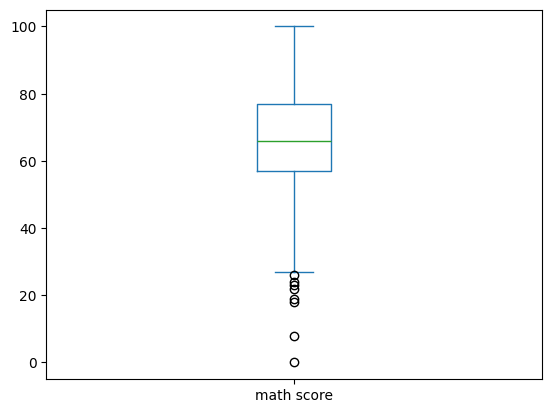

In [ ]:
df["math score"].plot.box()

**Interpretation :**

---
- Outliers below 27 in math score.

**Explaination :**

----
- Lower Fence = Q1 - 1.5 × IQR = 57 - (1.5 × 20) = 27
- Upper Fence = Q3 + 1.5 × IQR = 77 + (1.5 × 20) = 107

In [ ]:
# check for outliers below 27
df[df['math score'] < 27]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36
980,female,group B,high school,free/reduced,none,8,24,23


In [ ]:
# check for outliers below 27
df[df['math score'] < 27].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 17 to 980
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       8 non-null      object
 1   race/ethnicity               8 non-null      object
 2   parental level of education  8 non-null      object
 3   lunch                        8 non-null      object
 4   test preparation course      8 non-null      object
 5   math score                   8 non-null      int64 
 6   reading score                8 non-null      int64 
 7   writing score                8 non-null      int64 
dtypes: int64(3), object(5)
memory usage: 576.0+ bytes


**Interpretation :**

---
- Only 8 entries in math score can be considered as outliers.
- 1 of the 8 is a null score.

In [ ]:
# check for math score = 0
df[df["math score"] == 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


**Interpretation :**

---
- Only one student scored 0 in maths.

In [ ]:
gender_race_math_score = df.groupby(["gender", "race/ethnicity"]).agg({
    "math score" : ["mean", "min", "max"]
}).rename(columns={"math score": "Math"})
gender_race_math_score

Math         
                            mean min  max
gender race/ethnicity                    
female group A         58.527778  34   92
       group B         61.403846   8   97
       group C         62.033333   0   96
       group D         65.248062  26   98
       group E         70.811594  32  100
male   group A         63.735849  28  100
       group B         65.930233  30   94
       group C         67.611511  27   98
       group D         69.413534  39  100
       group E         76.746479  30  100

**Interpretation :**

---
- The female side show less scores than the male gender in all groups.
- For both the male and female gender, the group A scores the lowest, whilst the group E is scores the greatest.
- The group C of the female gender has a min score of 0, which is a possible outlier.

**Questions :**

---
- Why does the group E excels? is it a cultural factor?
- Why the group A lacks ?

In [ ]:
gender_race_math_score = gender_race_math_score.reset_index()

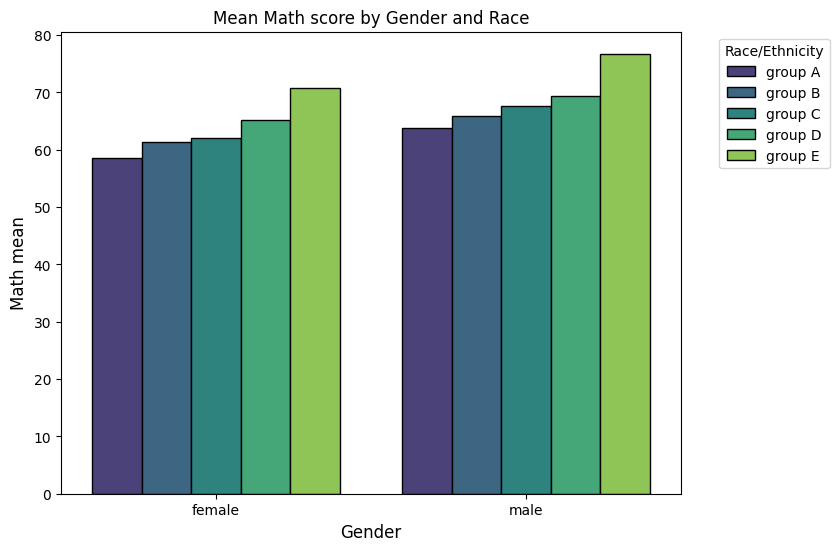

In [ ]:
# visualize math mean by gender and race
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(
    data=gender_race_math_score,
    x="gender",
    hue="race/ethnicity",
    y=("Math","mean"),
    palette="viridis",
    edgecolor="black"
)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Math mean", fontsize=12)
plt.title("Mean Math score by Gender and Race")
plt.legend(title="Race/Ethnicity", bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
# Math score by race and parental education level
race_parental_math_score = df.groupby(["race/ethnicity", "parental level of education"]).agg({
    "math score" : ["mean", "min", "max"]
})
race_parental_math_score

math score         
                                                 mean min  max
race/ethnicity parental level of education                    
group A        associate's degree           61.000000  37   97
               bachelor's degree            67.166667  45   91
               high school                  60.444444  34   77
               master's degree              57.666667  50   73
               some college                 63.888889  28  100
               some high school             58.916667  38   92
group B        associate's degree           66.097561  40   94
               bachelor's degree            69.300000  48   97
               high school                  59.791667   8   87
               master's degree              67.166667  49   90
               some college                 63.189189  19   91
               some high school             61.815789  18   94
group C        associate's degree           66.730769  39   98
               bachelor's degree            68.150000  37   96
               high school                  60.906250  27   90
               master's degree              67.052632  40   91
               some college                 65.130435  22   98
               some high school             60.551020   0   85
group D        associate's degree           67.600000  26   90
               bachelor's degree            67.571429  29   93
               high school                  62.863636  39   89
               master's degree              72.521739  40   95
               some college                 68.731343  40  100
               some high school             66.760000  27   97
group E        associate's degree           74.897436  46  100
               bachelor's degree            76.555556  37  100
               high school                  70.772727  41   99
               master's degree              74.625000  45   94
               some college                 73.828571  42  100
               some high school             72.111111  30   94

In [ ]:
race_parental_math_score = race_parental_math_score.reset_index()

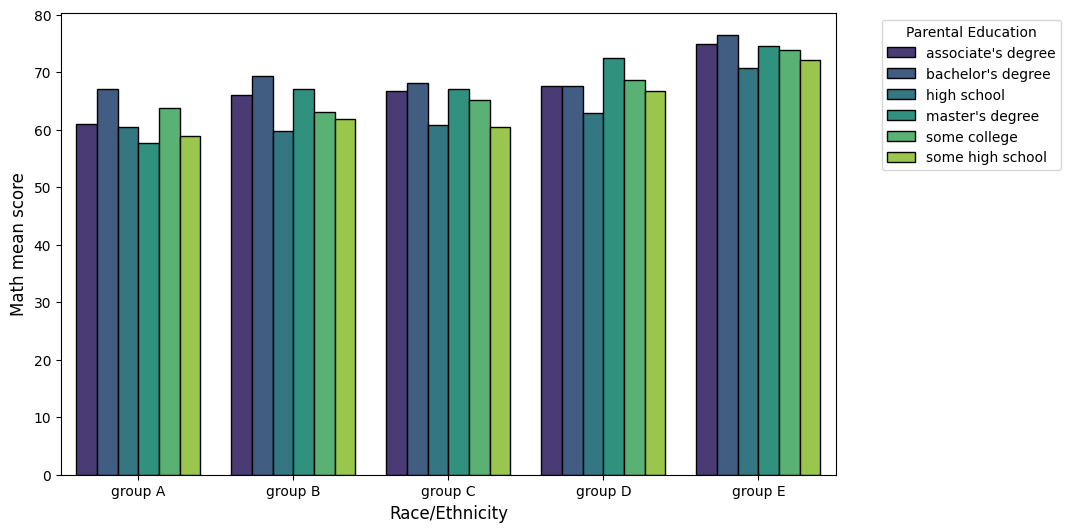

In [ ]:
# visualize Math score by race and parental education level
plt.figure(figsize=(10, 6))
sns.barplot(
    data=race_parental_math_score,
    x="race/ethnicity",
    hue="parental level of education",
    y=("math score", "mean"),
    palette="viridis",
    edgecolor="black"
)
plt.xlabel("Race/Ethnicity", size=12)
plt.ylabel("Math mean score", size=12)
plt.legend(title="Parental Education", bbox_to_anchor=(1.05, 1))
plt.show()

**Interpretation :**

---
- Parental level has no significant effect on math scores.
- The high school level of education has the least scores across all groups except the group A.
- The bachelor's degree level of education has the most scores across all groups except the group D.

In [ ]:
# Revisualise the main dataframe
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
race_lunch_math_score = df.groupby(["race/ethnicity","lunch"]).agg({
    "math score": ["mean", "min", "max"]
})
race_lunch_math_score

math score         
                                  mean min  max
race/ethnicity lunch                           
group A        free/reduced  55.222222  28   81
               standard      65.981132  45  100
group B        free/reduced  57.434783   8   88
               standard      66.884298  19   97
group C        free/reduced  56.412281   0   87
               standard      68.941463  29   98
group D        free/reduced  61.115789  26   93
               standard      70.916168  40  100
group E        free/reduced  66.560976  32  100
               standard      76.828283  30  100

In [ ]:
# reset index for visualization
race_lunch_math_score = race_lunch_math_score.reset_index()

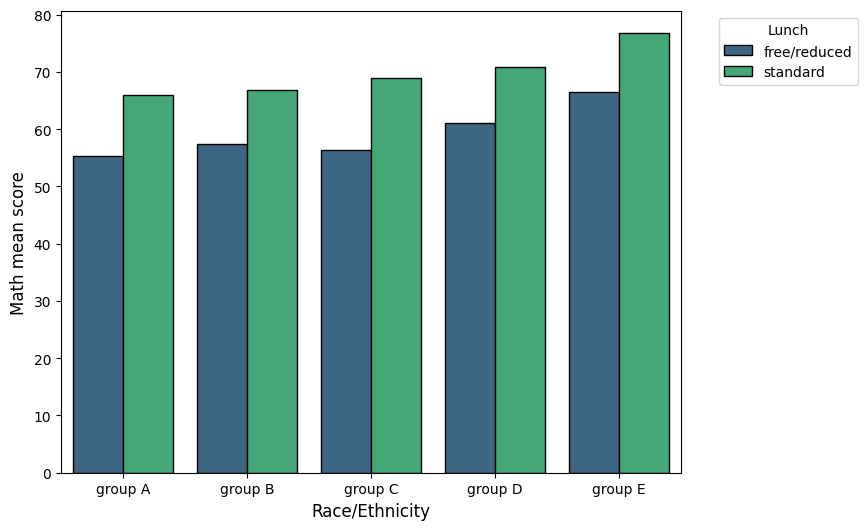

In [ ]:
# visualize Math score by race and lunch
plt.figure(figsize=(8, 6))
sns.barplot(
    data=race_lunch_math_score,
    x="race/ethnicity",
    hue="lunch",
    y=("math score", "mean"),
    palette="viridis",
    edgecolor="black"
)
plt.xlabel("Race/Ethnicity", size=12)
plt.ylabel("Math mean score", size=12)
plt.legend(title="Lunch", bbox_to_anchor=(1.05, 1))
plt.show()

**Interpretation :**

---
- The free/reduced lunch has the least scores across all different groups, whilst standard lunch scores the most.

In [ ]:
race_preperation_math_score = df.groupby(["race/ethnicity","test preparation course"]).agg({
    "math score": ["mean", "min", "max"]
})
race_preperation_math_score

math score         
                                             mean min  max
race/ethnicity test preparation course                    
group A        completed                68.258065  34  100
               none                     58.086207  28   91
group B        completed                67.191176  23   94
               none                     61.368852   8   97
group C        completed                67.495726  29   98
               none                     62.707921   0   97
group D        completed                69.792683  35  100
               none                     66.255556  26   98
group E        completed                77.433333  42  100
               none                     71.112500  30  100

**Interpretation :**

---
- The students that completed the test preparation score more than those with none across all groups.
- The students of group A who completed test score the least, whilst those of group E score the most.

# **3. Reading score**

<Axes: ylabel='Frequency'>

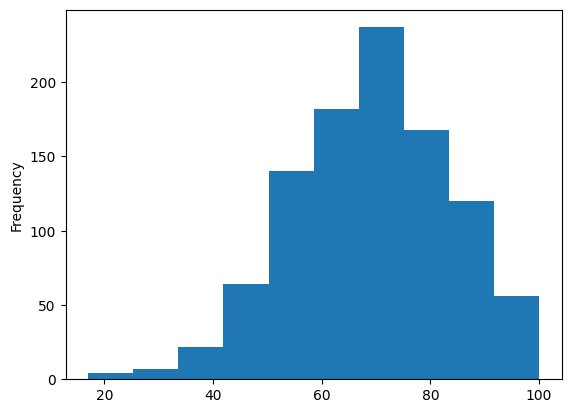

In [ ]:
# hist plot the reading score
df["reading score"].plot.hist()

**Interpretation :**

---
- Same as math score, reading score is has possible outliers in the 0 to 30 region.

In [ ]:
# Show null values for reading score
df[df["reading score"] == 0]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


**Interpretation :**

---
- The reading score has no null values.

<Axes: >

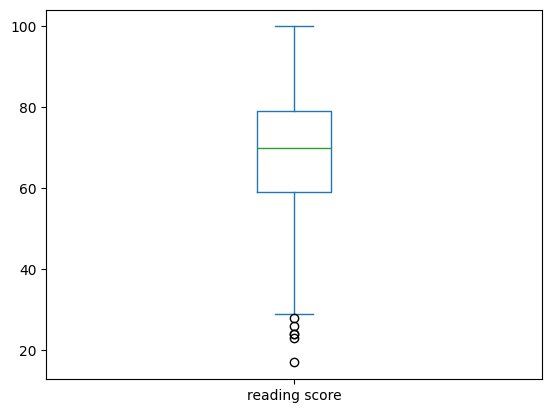

In [ ]:
df["reading score"].plot.box()

**Interpretation :**

---
- Reading score has outliers.
- Q1 (25th percentile) = 59
- Q3 (75th percentile) = 79
- IQR (Interquartile Range) = Q3 - Q1 = 79 - 59 = 20
- Lower Fence = Q1 - 1.5 × IQR = 59 - (1.5 × 20) = 29
- Upper Fence = Q3 + 1.5 × IQR = 79 + (1.5 × 20) = 109

In [ ]:
# Show outliers of reading score
df[df["reading score"] < 29]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [ ]:
df[df["reading score"] < 29].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 59 to 980
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       6 non-null      object
 1   race/ethnicity               6 non-null      object
 2   parental level of education  6 non-null      object
 3   lunch                        6 non-null      object
 4   test preparation course      6 non-null      object
 5   math score                   6 non-null      int64 
 6   reading score                6 non-null      int64 
 7   writing score                6 non-null      int64 
dtypes: int64(3), object(5)
memory usage: 432.0+ bytes


**Interpretation :**

---
- 6 outliers are shown for the reading score.

In [ ]:
# Group by gender and race for reading scores
gender_race_reading_score = df.groupby(["gender", "race/ethnicity"]).agg({
    "reading score": ["mean", "min", "max"]
}).rename(columns={"reading score": "Reading"})
gender_race_reading_score

Reading         
                            mean min  max
gender race/ethnicity                    
female group A         69.000000  43  100
       group B         71.076923  24   97
       group C         71.944444  17  100
       group D         74.046512  31  100
       group E         75.840580  34  100
male   group A         61.735849  23   96
       group B         62.848837  24   96
       group C         65.424460  28  100
       group D         66.135338  34   97
       group E         70.295775  26  100

**Interpretation :**

---
- Females have better scores in reading across all groups compared to males.
- The group A scores the least for both males and females, whilst group E scores the most for both genders.
- The groups B and C of females, and the groups A, B, C and E of males have a min score beneath the lower fence (29), therafore they can be labeled as outliers.

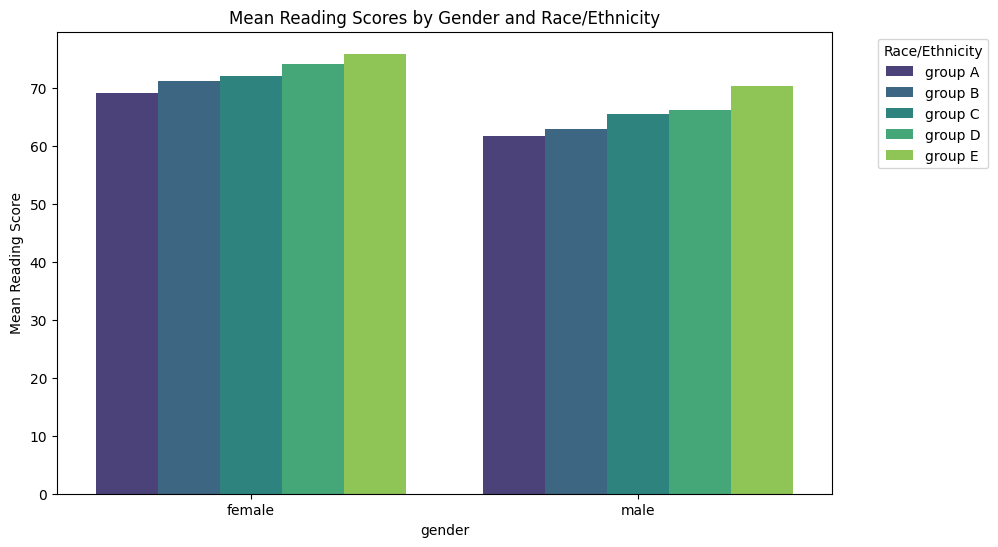

In [ ]:
# Visualize mean reading scores by gender and race
plt.figure(figsize=(10, 6))
sns.barplot(
    data=gender_race_reading_score.reset_index(),
    x="gender",
    y=("Reading", "mean"),
    hue="race/ethnicity",
    palette="viridis"
)
plt.title("Mean Reading Scores by Gender and Race/Ethnicity")
plt.ylabel("Mean Reading Score")
plt.legend(title="Race/Ethnicity", bbox_to_anchor=(1.05, 1))
plt.show()

In [ ]:
# Group by race and test preparation for reading scores
race_preparation_reading_score = df.groupby(["race/ethnicity", "test preparation course"]).agg({
    "reading score": ["mean", "min", "max"]
})
print("\nReading scores by race and test preparation:")
race_preparation_reading_score


Reading scores by race and test preparation:


reading score         
                                                mean min  max
race/ethnicity test preparation course                       
group A        completed                   71.032258  41  100
               none                        61.275862  23   96
group B        completed                   72.852941  44   97
               none                        64.286885  24   97
group C        completed                   73.658120  37  100
               none                        66.465347  17   95
group D        completed                   74.146341  41  100
               none                        68.155556  31  100
group E        completed                   76.666667  43  100
               none                        70.300000  26  100

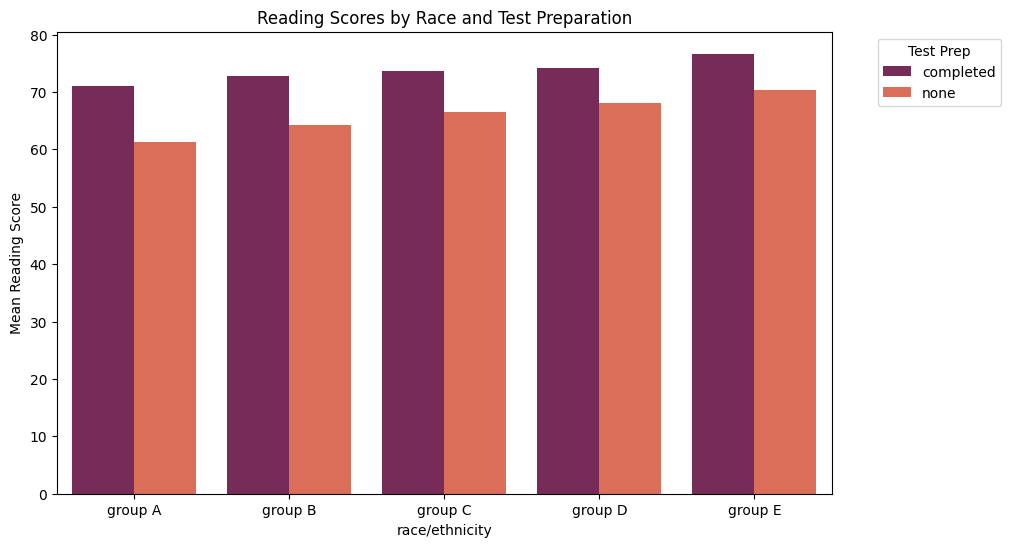

In [ ]:
# Visualize race and test preparation
race_preparation_reading_score.reset_index(inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=race_preparation_reading_score,
    x="race/ethnicity",
    y=("reading score", "mean"),
    hue="test preparation course",
    palette="rocket"
)
plt.title("Reading Scores by Race and Test Preparation")
plt.ylabel("Mean Reading Score")
plt.legend(title="Test Prep", bbox_to_anchor=(1.05, 1))
plt.show()

**Interpretation :**

---
- The students of all different groups who completed the test score significantly more than those who didn't.
- The students who didn't complete the test have a min score less than the lower fence (29) except the group D.
- The group A scores the least, the group E scores the most, for both completed and non completed test.

In [ ]:
# revisualize the df
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# race parental level by reading score
race_parental_reading = df.groupby(["race/ethnicity", "parental level of education"]).agg({
    "reading score": ["mean", "min", "max"]
})
race_parental_reading

reading score         
                                                    mean min  max
race/ethnicity parental level of education                       
group A        associate's degree              67.071429  51   93
               bachelor's degree               68.083333  49   96
               high school                     62.888889  43   88
               master's degree                 64.666667  53   74
               some college                    65.777778  23   96
               some high school                62.083333  31  100
group B        associate's degree              69.585366  41   94
               bachelor's degree               72.950000  51   97
               high school                     63.458333  24   95
               master's degree                 80.166667  53   97
               some college                    65.756757  38   96
               some high school                66.447368  32   90
group C        associate's degree              71.128205  37  100
               bachelor's degree               75.675000  51  100
               high school                     64.421875  29   89
               master's degree                 70.526316  42   91
               some college                    69.420290  28   95
               some high school                65.632653  17   92
group D        associate's degree              70.540000  31   95
               bachelor's degree               70.142857  41  100
               high school                     64.409091  34   99
               master's degree                 77.173913  58  100
               some college                    70.880597  42  100
               some high school                69.980000  34  100
group E        associate's degree              73.820513  43  100
               bachelor's degree               74.833333  45  100
               high school                     70.318182  45   93
               master's degree                 82.125000  56   99
               some college                    72.628571  51   92
               some high school                69.555556  26   88

In [ ]:
race_parental_reading = race_parental_reading.reset_index()

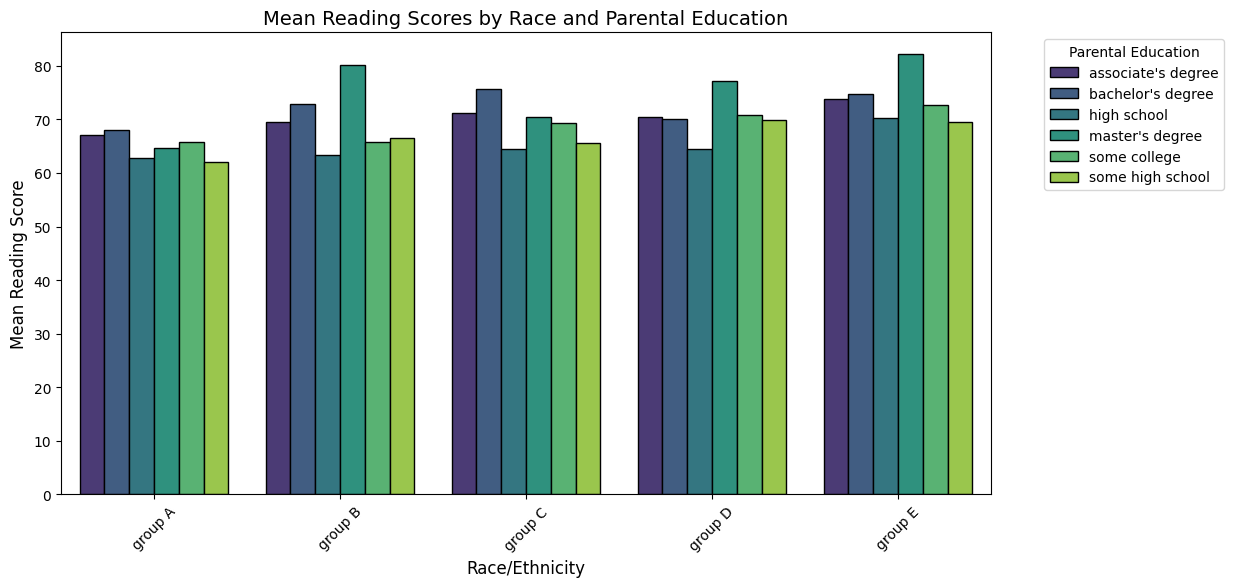

In [ ]:
# visualize reading score by race and parental level education
race_parental_reading.columns = ["race", "parental_education", "mean_reading", "min_reading", "max_reading"]

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(
    data=race_parental_reading,
    x="race",
    y="mean_reading",
    hue="parental_education",
    palette="viridis",
    edgecolor="black"
)
plt.title("Mean Reading Scores by Race and Parental Education", fontsize=14)
plt.xlabel("Race/Ethnicity", fontsize=12)
plt.ylabel("Mean Reading Score", fontsize=12)
plt.legend(title="Parental Education", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.show()

**Interpretation :**

---
- The students with parents of master's degree score the highest for the groups B, D and E.
- The students with parents of high school and some high school score the lowest for all different groups.
- The group E scores the best, whilst the group A scores the least across all education levels.

In [ ]:
# reading score by race and lunch
race_lunch_reading = df.groupby(["race/ethnicity", "lunch"]).agg({
    "reading score": ["mean", "min", "max"]
})
race_lunch_reading

reading score         
                                     mean min  max
race/ethnicity lunch                              
group A        free/reduced     60.555556  23   88
               standard         67.471698  31  100
group B        free/reduced     63.971014  24   97
               standard         69.280992  38   97
group C        free/reduced     63.412281  17   93
               standard         72.268293  29  100
group D        free/reduced     66.431579  31  100
               standard         72.077844  34  100
group E        free/reduced     68.731707  34  100
               standard         74.808081  26  100

In [ ]:
# reset index
race_lunch_reading = race_lunch_reading.reset_index()

# Rename columns
race_lunch_reading.columns = ["race", "lunch", "mean_reading", "min_reading", "max_reading"]

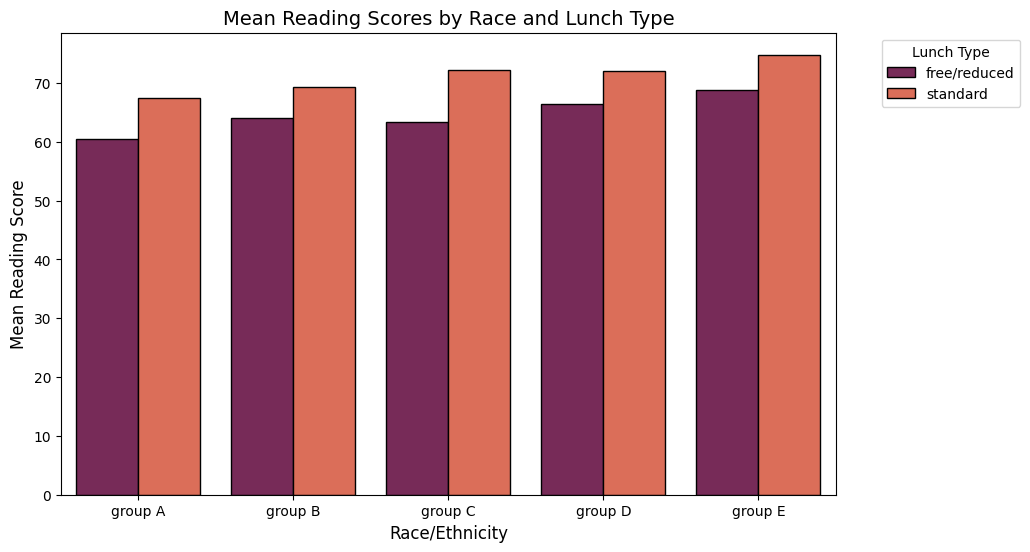

In [ ]:
# Visualize reading score by race and lunch
plt.figure(figsize=(10, 6))
sns.barplot(
    data=race_lunch_reading,
    x="race",
    y="mean_reading",
    hue="lunch",
    palette="rocket",
    edgecolor="black"
)
plt.title("Mean Reading Scores by Race and Lunch Type", fontsize=14)
plt.xlabel("Race/Ethnicity", fontsize=12)
plt.ylabel("Mean Reading Score", fontsize=12)
plt.legend(title="Lunch Type", bbox_to_anchor=(1.05, 1))
plt.show()

**Interpretation :**

---
- The group E scores the most, while the group A scores the least for both free/reduced and standard lunch.
- The standard lunch type scores the most, while the free/reduced type scores the least across all groups.

# **4. Writing score**

In [ ]:
# revisilize the df
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


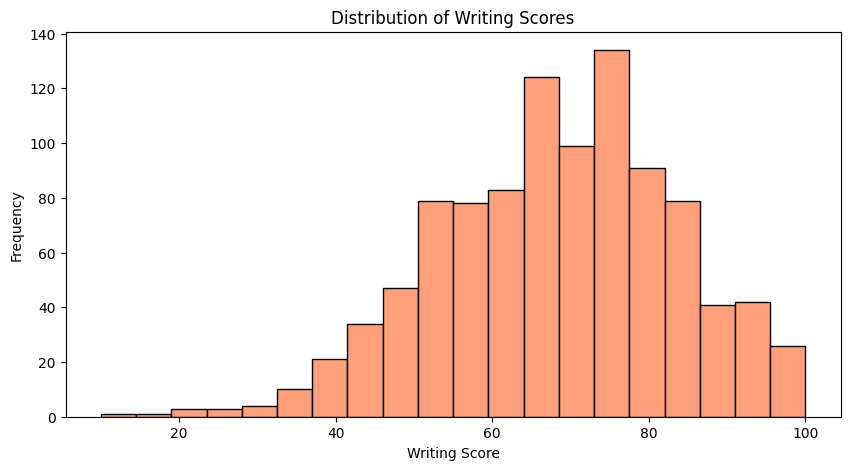

In [ ]:
# Histogram for writing score
plt.figure(figsize=(10, 5))
df["writing score"].plot.hist(bins=20, edgecolor="black", color="#FFA07A")
plt.title("Distribution of Writing Scores")
plt.xlabel("Writing Score")
plt.ylabel("Frequency")
plt.show()

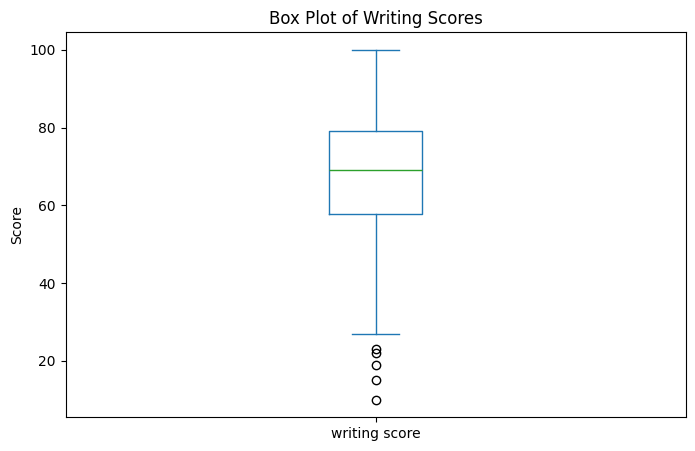

In [ ]:
# Box Plot for writing score
plt.figure(figsize=(8, 5))
df["writing score"].plot.box()
plt.title("Box Plot of Writing Scores")
plt.ylabel("Score")
plt.show()

In [ ]:
# Calculate fences
Q1 = df["writing score"].quantile(0.25)
Q3 = df["writing score"].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
print("lower_fence : ", lower_fence)
print("upper_fence : ", upper_fence)

lower_fence :  25.875
upper_fence :  110.875


In [ ]:
# Identify outliers
writing_outliers = df[df["writing score"] < lower_fence]
writing_outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15
980,female,group B,high school,free/reduced,none,8,24,23


In [ ]:
writing_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 59 to 980
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       5 non-null      object
 1   race/ethnicity               5 non-null      object
 2   parental level of education  5 non-null      object
 3   lunch                        5 non-null      object
 4   test preparation course      5 non-null      object
 5   math score                   5 non-null      int64 
 6   reading score                5 non-null      int64 
 7   writing score                5 non-null      int64 
dtypes: int64(3), object(5)
memory usage: 360.0+ bytes


**Interpretation :**

---
- 5 outliers are detected for the writing score, since they're below the lower fence (25.875)

In [ ]:
# writing score by gender and race
gender_race_writing = df.groupby(["gender", "race/ethnicity"]).agg({
    "writing score": ["mean", "min", "max"]
}).rename(columns={"writing score": "Writing"})
gender_race_writing

Writing         
                            mean min  max
gender race/ethnicity                    
female group A         67.861111  41   97
       group B         70.048077  23   96
       group C         71.777778  10  100
       group D         75.023256  32  100
       group E         75.536232  38  100
male   group A         59.150943  19   92
       group B         60.220930  15   92
       group C         62.712230  27   95
       group D         65.413534  34   99
       group E         67.394366  22  100

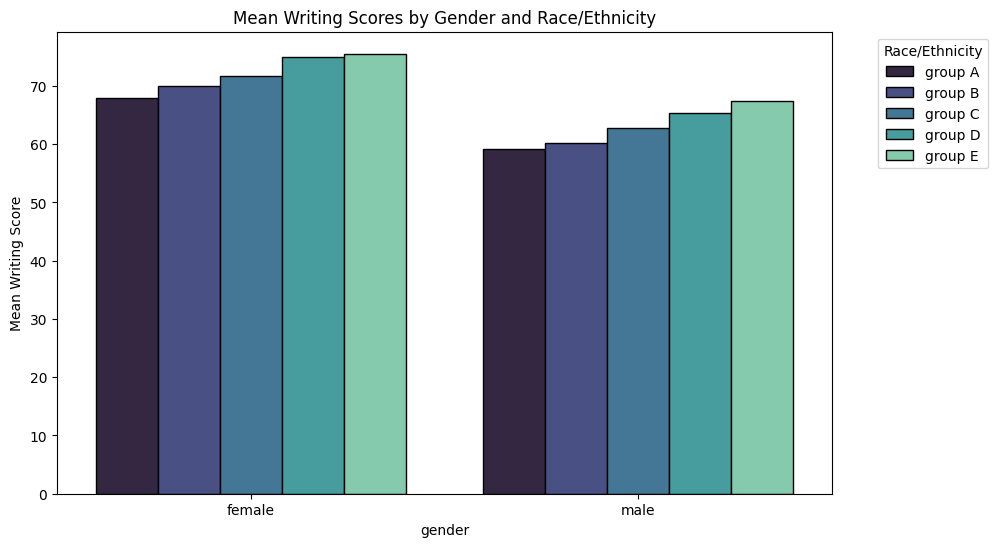

In [ ]:
# Visualize writing score by gender and race
plt.figure(figsize=(10, 6))
sns.barplot(
    data=gender_race_writing.reset_index(),
    x="gender",
    y=("Writing", "mean"),
    hue="race/ethnicity",
    palette="mako",
    edgecolor="black"
)
plt.title("Mean Writing Scores by Gender and Race/Ethnicity")
plt.ylabel("Mean Writing Score")
plt.legend(title="Race/Ethnicity", bbox_to_anchor=(1.05, 1))
plt.show()

**Interpretation :**

---
- The group E scores the most for both genders, while the group A scores the least.
- The group B and C for female gender, and A and B for male gender scored a min under the lower fence, which can be considered as outliers.
- The female gender show better scores across all groups compared to the male gender.

In [ ]:
# writing score by race and parental level
race_parental_writing = df.groupby(["race/ethnicity", "parental level of education"]).agg({
    "writing score": ["mean", "min", "max"]
})
race_parental_writing = race_parental_writing.reset_index()

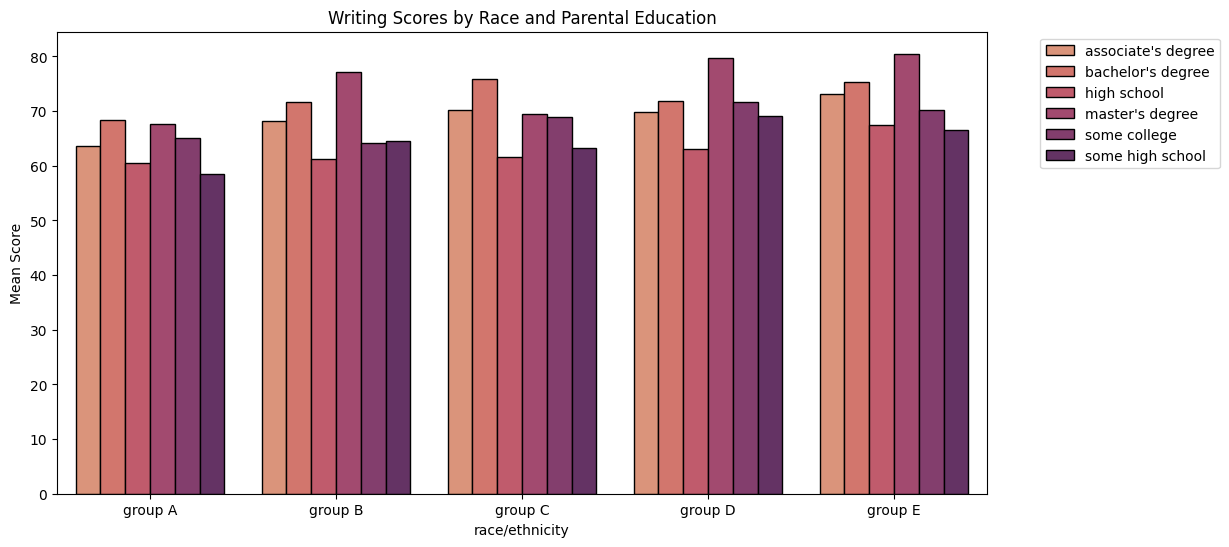

In [ ]:
# visualize writing score by race and parental level
plt.figure(figsize=(12, 6))
sns.barplot(
    data=race_parental_writing,
    x="race/ethnicity",
    y=("writing score", "mean"),
    hue="parental level of education",
    palette="flare",
    edgecolor="black"
)
plt.title("Writing Scores by Race and Parental Education")
plt.ylabel("Mean Score")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

**Interpretation :**

---
- The group E scores the most for all education levels, while the group A scores the least.
- The level master's degree scores the most for the groups B, D and E, while the bachelor's degree scores the most for the groups A and C.
- The high school and some high school levels scored the lowest for all groups.

In [ ]:
# writing score by race and lunch
race_lunch_writing = df.groupby(["race/ethnicity", "lunch"]).agg({
    "writing score": ["mean", "min", "max"]
})
race_lunch_writing

writing score         
                                     mean min  max
race/ethnicity lunch                              
group A        free/reduced     57.194444  19   85
               standard         66.396226  36   97
group B        free/reduced     61.521739  15   94
               standard         67.925620  32   96
group C        free/reduced     61.412281  10   93
               standard         71.395122  30  100
group D        free/reduced     66.452632  32  100
               standard         72.245509  36  100
group E        free/reduced     67.195122  38  100
               standard         73.151515  22  100

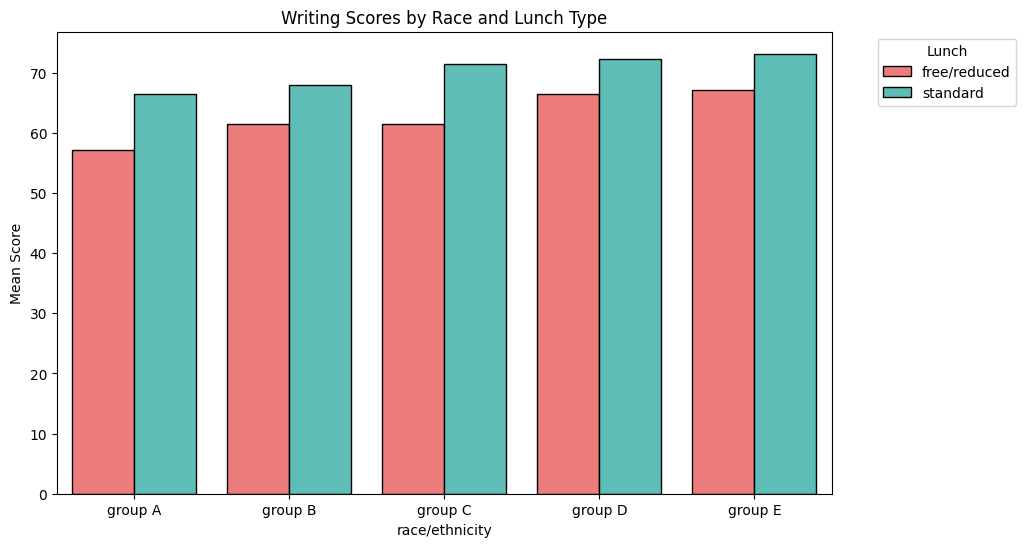

In [ ]:
# visualize writing score by race and lunch
plt.figure(figsize=(10, 6))
sns.barplot(
    data=race_lunch_writing,
    x="race/ethnicity",
    y=("writing score", "mean"),
    hue="lunch",
    palette=["#FF6B6B", "#4ECDC4"],
    edgecolor="black"
)
plt.title("Writing Scores by Race and Lunch Type")
plt.ylabel("Mean Score")
plt.legend(title="Lunch", bbox_to_anchor=(1.05, 1))
plt.show()

**Interpretation :**

---
- The group E scores the most, while the group A scores the least for both free/reduced and standard lunch.
- The standard lunch type scores the most, while the free/reduced type scores the least across all groups.

In [ ]:
# writing score by race and test preperation course
race_test_preperation_writing = df.groupby(["race/ethnicity","test preparation course"]).agg({
    "writing score": ["mean", "min", "max"]
})
race_test_preperation_writing

writing score         
                                                mean min  max
race/ethnicity test preparation course                       
group A        completed                   70.903226  41   97
               none                        58.275862  19   93
group B        completed                   71.882353  36   94
               none                        62.098361  15   96
group C        completed                   74.452991  40  100
               none                        63.990099  10   95
group D        completed                   76.658537  38  100
               none                        67.177778  32  100
group E        completed                   75.983333  44  100
               none                        67.975000  22  100

In [ ]:
race_test_preperation_writing = race_test_preperation_writing.reset_index()

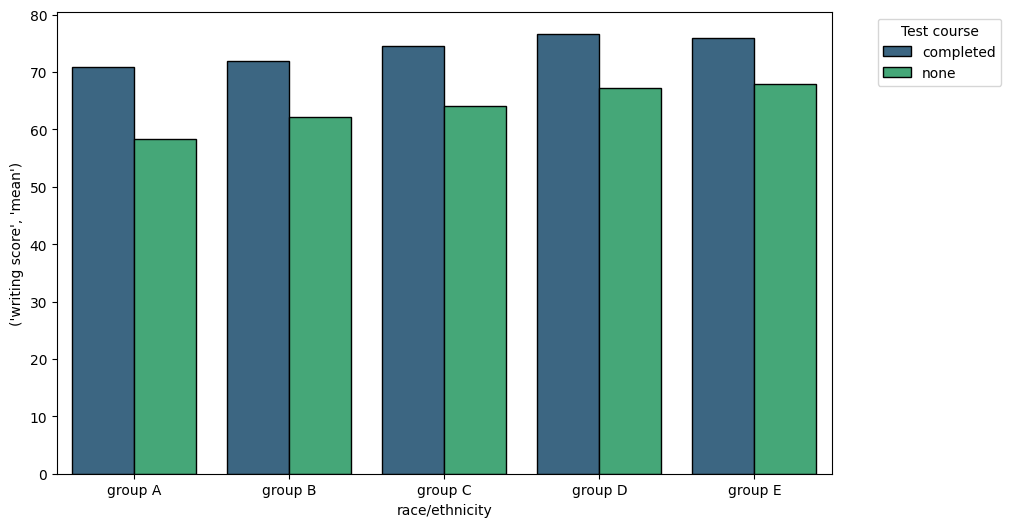

In [ ]:
# visualize writing score by race and test preperation course
plt.figure(figsize=(10, 6))
sns.barplot(
    data=race_test_preperation_writing,
    x="race/ethnicity",
    hue="test preparation course",
    y=("writing score", "mean"),
    palette="viridis",
    edgecolor="black"
)
plt.legend(title="Test course", bbox_to_anchor=(1.05, 1))
plt.show()

**Interpretation :**

---
- The students of all different groups who completed the test score significantly more than those who didn't.
- The students who didn't complete the test have a min score less than the lower fence (25) except the group D.
- The group A scores the least, the group D scores the most, for both completed and non completed test.

# **5. Scores correlations**

In [ ]:
# revisualize df
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


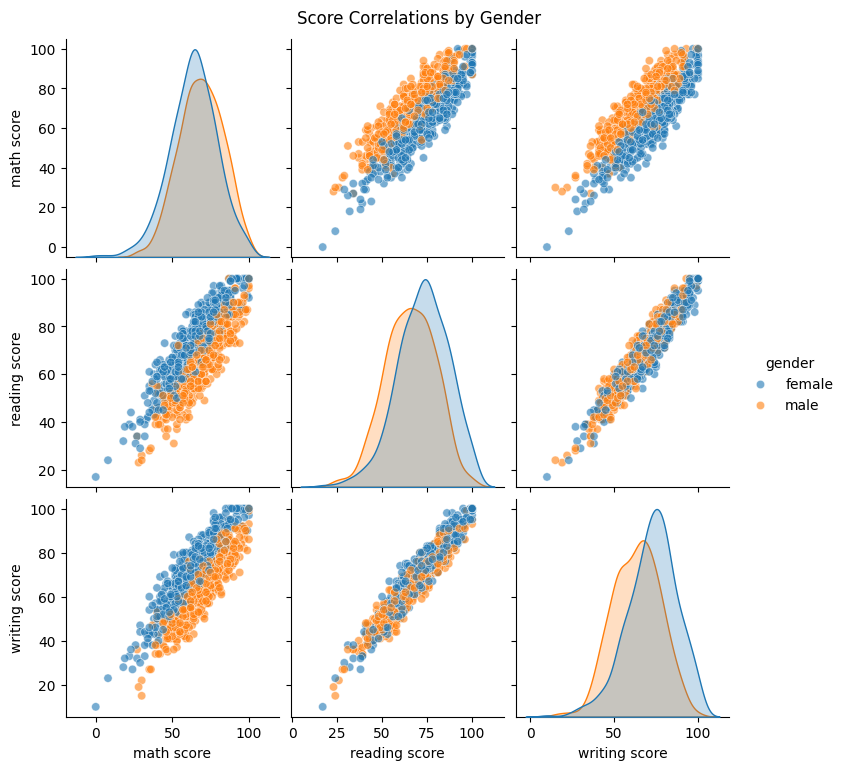

In [ ]:
# Pair plot for writing vs. math/reading
sns.pairplot(
    df,
    vars=["math score", "reading score", "writing score"],
    hue="gender",
    plot_kws={"alpha": 0.6}
)
plt.suptitle("Score Correlations by Gender", y=1.02)
plt.show()

<Axes: >

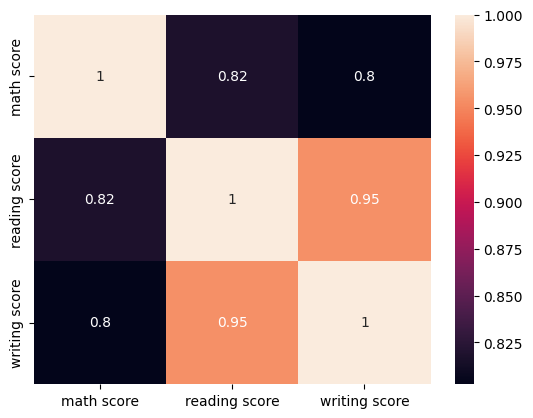

In [ ]:
sns.heatmap(df[["math score", "reading score", "writing score"]].corr(), annot=True)

**Interpretation :**

---
- The reading and writing scores show strong correlation.

# **II. Data Cleaning**

- **Dealing with null values**

In [ ]:
# show null values
df[(df["math score"] == 0) | (df["reading score"] == 0) | (df["writing score"] == 0)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [ ]:
# keep its index
null_math_cell_index = df[(df["math score"] == 0) | (df["reading score"] == 0) | (df["writing score"] == 0)].index

In [ ]:
# check for similar rows in terms of features
similar_feature_rows_to_null_math_val = df[
    (df["gender"] == "female") &
    (df["race/ethnicity"] == "group C") &
    (df["parental level of education"] == "some high school") &
    (df["lunch"] == "free/reduced") &
    (df["test preparation course"] == "none")
  ]
similar_feature_rows_to_null_math_val

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
222,female,group C,some high school,free/reduced,none,55,65,62
262,female,group C,some high school,free/reduced,none,44,50,51
278,female,group C,some high school,free/reduced,none,65,86,80
323,female,group C,some high school,free/reduced,none,43,53,53
824,female,group C,some high school,free/reduced,none,48,58,52
929,female,group C,some high school,free/reduced,none,48,56,51


In [ ]:
# assign the math score mean of similar rows to the null math score row
similar_feature_rows_to_null_math_val_mean = int(round(similar_feature_rows_to_null_math_val["math score"].mean()))
df_cleaned = df
df_cleaned.loc[null_math_cell_index, "math score"] = similar_feature_rows_to_null_math_val_mean
df_cleaned.loc[null_math_cell_index]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,43,17,10


In [ ]:
# statistics after cleaning
df_cleaned[["math score", "reading score", "writing score"]].describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.132000,69.169000,68.054000
std,15.035912,14.600192,15.195657
min,8.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


<Axes: title={'center': 'Math Scores After Cleaning'}, ylabel='Frequency'>

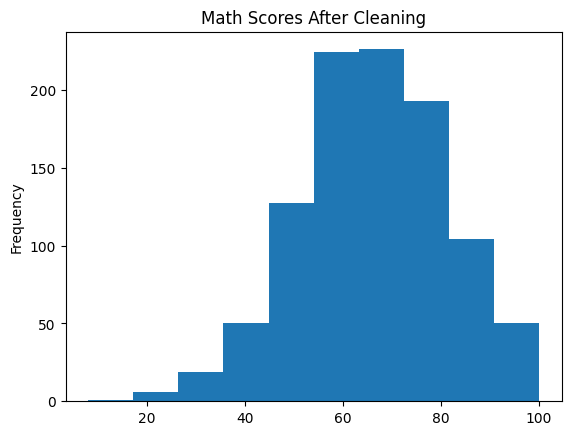

In [ ]:
# visualize df cleaned
df_cleaned["math score"].plot.hist(title="Math Scores After Cleaning")

- **Dealing with Outliers : in general**

In [ ]:
# defining fences for all scores
math_fence = 27
reading_fence = 29
writing_fence = 25

In [ ]:
# show common ouliers between the 3 columns
df_cleaned[
    (df_cleaned["math score"] < math_fence) &
    (df_cleaned["reading score"] < reading_fence) &
    (df_cleaned["writing score"] < writing_fence)
    ]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
980,female,group B,high school,free/reduced,none,8,24,23


In [ ]:
# Drop this outlier using boolean masking
mask = (df_cleaned["math score"] < math_fence) & \
       (df_cleaned["reading score"] < reading_fence) & \
       (df_cleaned["writing score"] < writing_fence)
df_cleaned = df_cleaned[~mask]
print(len(df_cleaned))

999


**Interpretation :**

---
- The student droped has low scores across the 3 scores
- There isn't any other students with the similar scores, which makes this student a rare case.

**Treat Outliers :**

---
- I chose to remove this outlier.

- **Dealing with Outliers : Math score**

In [ ]:
# show ouliers for math score
df_cleaned[df_cleaned["math score"] < math_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
145,female,group C,some college,free/reduced,none,22,39,33
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
787,female,group B,some college,standard,none,19,38,32
842,female,group B,high school,free/reduced,completed,23,44,36


**Interpretation :**

---
- The outliers of math score show no odd expectations, as these students comply with the features impacting the math score.

**Explaination :**

---
- Females with free/reduced type of lunch, and a test preperation of none are expected to score low in maths.

**Treat Outliers :**

---
- Cap Outliers.

In [ ]:
# A function to cap outliers (replace with closest non outlier value)
def cap_outliers(df, column):
  # Calculate Fences
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_fence = Q1 - 1.5 * IQR
  upper_fence = Q3 + 1.5 * IQR

  df[column] = df[column].clip(lower=lower_fence, upper=upper_fence)
  return df

In [ ]:
# Apply function to math score column outliers
df_cleaned = cap_outliers(df_cleaned, "math score")

<ipython-input-80-98c1e495f24d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_fence, upper=upper_fence)


In [ ]:
# check for math score ouliers
df_cleaned[df_cleaned["math score"] < math_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


<Axes: ylabel='Frequency'>

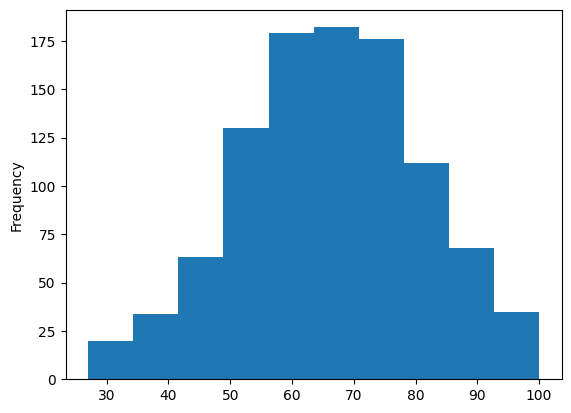

In [ ]:
# hist plot math score
df_cleaned["math score"].plot.hist()

<Axes: >

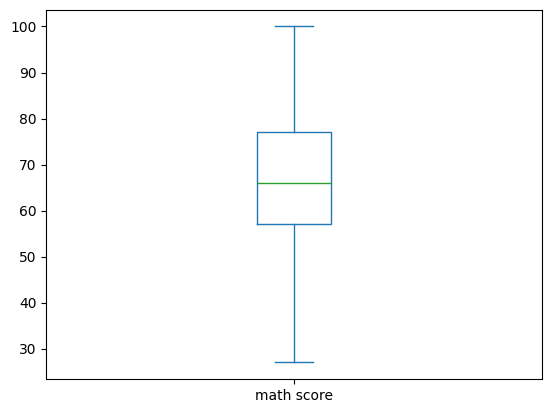

In [ ]:
# box plot math score
df_cleaned["math score"].plot.box()

**Interpretation :**

---
- After capping outliers, both the math score histogramme and box plots show the absolute absence of them.

- **Dealing with Outliers : reading score**

In [ ]:
# reading score outliers
df_cleaned[df_cleaned["reading score"] < reading_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,43,17,10
76,male,group E,some high school,standard,none,30,26,22
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
596,male,group B,high school,free/reduced,none,30,24,15


**Interpretation :**

---
- The female in this output has a math score higher than both reading and writing scores which is seemingly suspicious.

In [ ]:
# checking for females who have a math score higher than both reading and writing scores
df_cleaned[
  (df_cleaned["gender"] == "female") &
  (df_cleaned["math score"] > df_cleaned["reading score"]) &
  (df_cleaned["math score"] > df_cleaned["writing score"])
  ].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,43,17,10
140,female,group D,some high school,standard,none,76,72,71
242,female,group D,high school,standard,none,56,52,55
248,female,group B,high school,standard,none,65,64,62
263,female,group E,high school,standard,none,99,93,90


In [ ]:
# Apply cap ouliers function to reading score column outliers
df_cleaned = cap_outliers(df_cleaned, "reading score")

<ipython-input-80-98c1e495f24d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_fence, upper=upper_fence)


In [ ]:
# reading score outliers
df_cleaned[df_cleaned["reading score"] < reading_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


<Axes: ylabel='Frequency'>

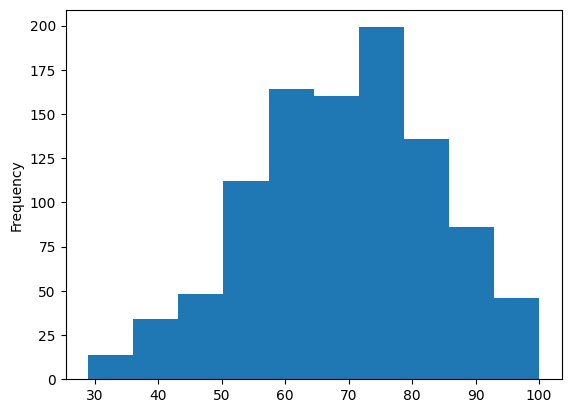

In [ ]:
# hist plot reading score
df_cleaned["reading score"].plot.hist()

<Axes: >

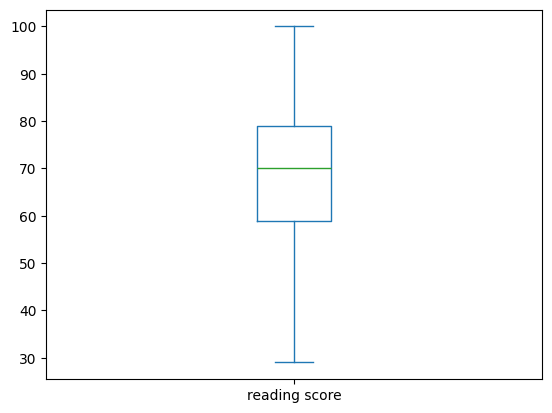

In [ ]:
# box plot reading score
df_cleaned["reading score"].plot.box()

**Interpretation :**

---
- After capping outliers, both the reading score histogramme and box plots show the absolute absence of them.

- **Dealing with Outliers : writing score**

In [ ]:
df_cleaned[df_cleaned["writing score"] < writing_fence]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,43,29,10
76,male,group E,some high school,standard,none,30,29,22
327,male,group A,some college,free/reduced,none,28,29,19
596,male,group B,high school,free/reduced,none,30,29,15


In [ ]:
# Apply cap ouliers function to writing score column outliers
df_cleaned = cap_outliers(df_cleaned, "writing score")

<ipython-input-80-98c1e495f24d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].clip(lower=lower_fence, upper=upper_fence)


<Axes: ylabel='Frequency'>

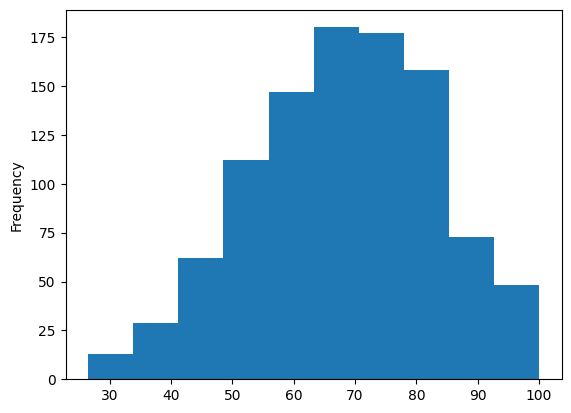

In [ ]:
# hist plot writing score
df_cleaned["writing score"].plot.hist()

<Axes: >

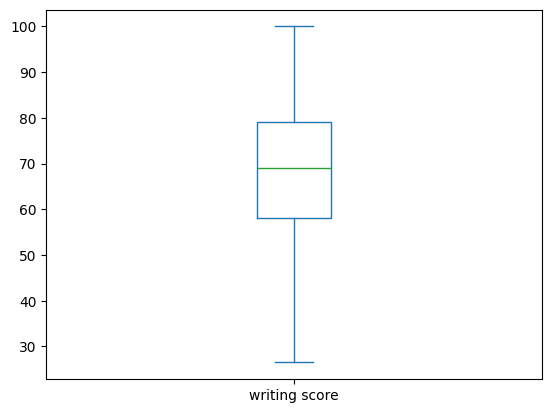

In [ ]:
# box plot writing score
df_cleaned["writing score"].plot.box()

**Interpretation :**

---
- After capping outliers, both the writing score histogramme and box plots show the absolute absence of them.

- **Dealing with Outliers : After cleaning**

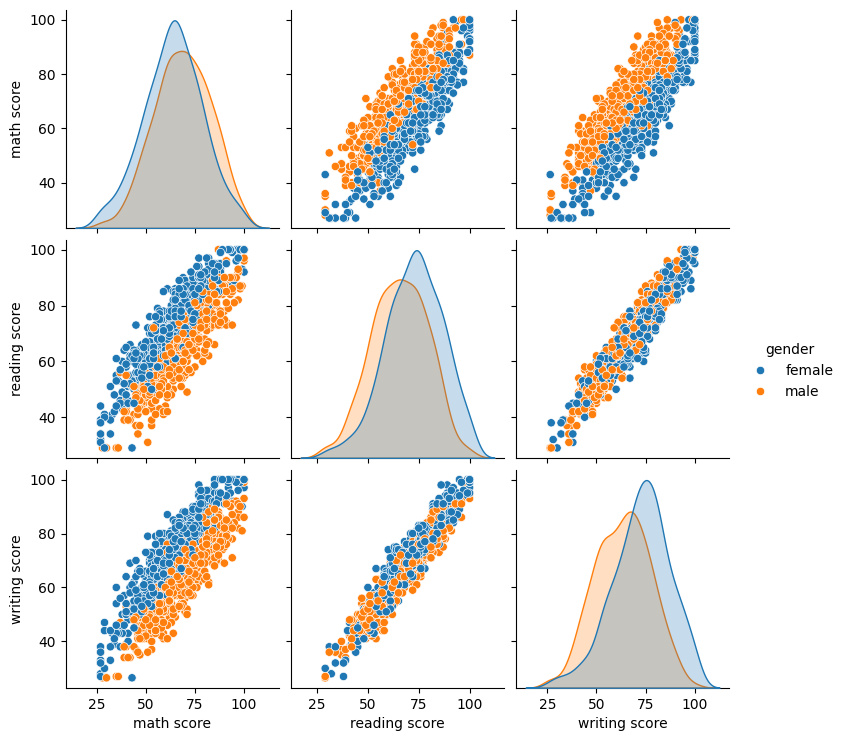

In [ ]:
sns.pairplot(
    df_cleaned,
    vars = ["math score", "reading score", "writing score"],
    hue="gender"
)

# **III. Feature Engineering**

In [ ]:
# revisualize the data
df_cleaned.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74.0
1,female,group C,some college,standard,completed,69,90,88.0
2,female,group B,master's degree,standard,none,90,95,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0
4,male,group C,some college,standard,none,76,78,75.0


- **Merge reading and writing scores**

In [ ]:
# create the verbal score (merge between reading and writing scores)
df_cleaned["verbal_score"] = (0.5 * df_cleaned["reading score"] + 0.5 * df_cleaned["writing score"]).round(2)

<ipython-input-97-30b7c7d153ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["verbal_score"] = (0.5 * df_cleaned["reading score"] + 0.5 * df_cleaned["writing score"]).round(2)


In [ ]:
# visualize the data
# df_cleaned = df_cleaned.drop("pass", axis=1)
df_cleaned.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,verbal_score
0,female,group B,bachelor's degree,standard,none,72,72,74.0,73.0
1,female,group C,some college,standard,completed,69,90,88.0,89.0
2,female,group B,master's degree,standard,none,90,95,93.0,94.0
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,50.5
4,male,group C,some college,standard,none,76,78,75.0,76.5


- **Create a new feature : Pass**

In [ ]:
# create a new feature "pass"
df_cleaned["pass"] = np.where(
    (df_cleaned["math score"] + df_cleaned["verbal_score"]) / 2 >= 50,
    "passed",
    "failed"
)

<ipython-input-99-7c22c409c822>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["pass"] = np.where(


In [ ]:
# visualize the data
df_cleaned["pass"].value_counts()

,count
pass,
passed,895
failed,104


**Interpretation :**

---
- The value counts of both passed and failed, is imbalenced, which may require further treatment later.

In [ ]:
# visualize the data
df_cleaned.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,verbal_score,pass
0,female,group B,bachelor's degree,standard,none,72,72,74.0,73.0,passed
1,female,group C,some college,standard,completed,69,90,88.0,89.0,passed
2,female,group B,master's degree,standard,none,90,95,93.0,94.0,passed
3,male,group A,associate's degree,free/reduced,none,47,57,44.0,50.5,failed
4,male,group C,some college,standard,none,76,78,75.0,76.5,passed


- **Dealing with redundant data**

In [ ]:
# Looking for duplicates
duplicates = df_cleaned[df_cleaned.duplicated(keep=False)]
print(f"Found {len(duplicates)} duplicate rows:")
print(duplicates.sort_values(by=list(df_cleaned.columns)))

Found 0 duplicate rows:
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score, verbal_score, pass]
Index: []


**Interpretation :**

---
- This shows the absence of duplicates across this dataset.

# **IV. Data Encoding**

- **Binary Categorical Columns : Label Encoding (0/1)**

In [ ]:
# Columns: gender, lunch, test preparation course
required_columns = ["gender", "lunch", "test preparation course"]

# Check if all required columns exist in the DataFrame
if all(col in df_cleaned.columns for col in required_columns):
  df_cleaned["gender_encoded"] = df_cleaned["gender"].map({"female": 0, "male": 1})
  df_cleaned["lunch_encoded"] = df_cleaned["lunch"].map({"free/reduced": 0, "standard": 1})
  df_cleaned["test_prep_encoded"] = df_cleaned["test preparation course"].map({"none": 0, "completed": 1})

  # Drop original columns
  df_cleaned.drop(["gender", "lunch", "test preparation course"], axis=1, inplace=True)

<ipython-input-103-a346bce3fa34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["gender_encoded"] = df_cleaned["gender"].map({"female": 0, "male": 1})
<ipython-input-103-a346bce3fa34>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["lunch_encoded"] = df_cleaned["lunch"].map({"free/reduced": 0, "standard": 1})
<ipython-input-103-a346bce3fa34>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
# Data visualised
df_cleaned.head()

,race/ethnicity,parental level of education,math score,reading score,writing score,verbal_score,pass,gender_encoded,lunch_encoded,test_prep_encoded
0,group B,bachelor's degree,72,72,74.0,73.0,passed,0,1,0
1,group C,some college,69,90,88.0,89.0,passed,0,1,1
2,group B,master's degree,90,95,93.0,94.0,passed,0,1,0
3,group A,associate's degree,47,57,44.0,50.5,failed,1,0,0
4,group C,some college,76,78,75.0,76.5,passed,1,1,0


- **Nominal Categorical Columns :  One-Hot Encoding**

In [ ]:
# One-Hot Encoding for race column
df_encoded = pd.get_dummies(
    df_cleaned,
    columns=["race/ethnicity"],
    prefix=["race"]
)
# label encode true and false in each race group column
race_groups = ["race_group A", "race_group B", "race_group C", "race_group D", "race_group E"]
for grp in race_groups:
  df_encoded[grp] = df_encoded[grp].map({True: 1, False: 0})

In [ ]:
# Data visualised
df_encoded.head()

,parental level of education,math score,reading score,writing score,verbal_score,pass,gender_encoded,lunch_encoded,test_prep_encoded,race_group A,race_group B,race_group C,race_group D,race_group E
0,bachelor's degree,72,72,74.0,73.0,passed,0,1,0,0,1,0,0,0
1,some college,69,90,88.0,89.0,passed,0,1,1,0,0,1,0,0
2,master's degree,90,95,93.0,94.0,passed,0,1,0,0,1,0,0,0
3,associate's degree,47,57,44.0,50.5,failed,1,0,0,1,0,0,0,0
4,some college,76,78,75.0,76.5,passed,1,1,0,0,0,1,0,0


- **Ordinal Categorical Columns : Ordinal Encoding**

In [ ]:
# Define order
education_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Map to integers
df_encoded["parent_edu_encoded"] = df_encoded["parental level of education"].map(
    {v: i for i, v in enumerate(education_order)}
)

In [ ]:
# Data visualised
df_encoded = df_encoded.drop("parental level of education", axis=1)
df_encoded.head()

,math score,reading score,writing score,verbal_score,pass,gender_encoded,lunch_encoded,test_prep_encoded,race_group A,race_group B,race_group C,race_group D,race_group E,parent_edu_encoded
0,72,72,74.0,73.0,passed,0,1,0,0,1,0,0,0,4
1,69,90,88.0,89.0,passed,0,1,1,0,0,1,0,0,2
2,90,95,93.0,94.0,passed,0,1,0,0,1,0,0,0,5
3,47,57,44.0,50.5,failed,1,0,0,1,0,0,0,0,3
4,76,78,75.0,76.5,passed,1,1,0,0,0,1,0,0,2
